**Raymoond-2301872381**

In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import multivariate_normal
from sklearn.mixture import gaussian_mixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.mixture.gaussian_mixture module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.mixture. Anything that cannot be imported from sklearn.mixture is now part of the private API.
  warnings.warn(message, FutureWarning)


Import Esential neeed function and library

In [ ]:
train_data = {'gmat':[780, 750, 690, 710, 680, 730, 690, 720, 740, 690, 610, 690, 710, 680, 770, 610, 580, 650, 540, 590, 620, 600, 550, 550, 570, 670, 660, 580, 650, 660, 640, 620, 660, 660, 680, 650, 670, 580, 590, 690],
        'gpa':[4, 3.9, 3.3, 3.7, 3.9, 3.7, 2.3, 3.3, 3.3, 1.7, 2.7, 3.7, 3.7, 3.3, 3.3, 3, 2.7, 3.7, 2.7, 2.3, 3.3, 2, 2.3, 2.7, 3, 3.3, 3.7, 2.3, 3.7, 3.3, 3, 2.7, 4, 3.3, 3.3, 2.3, 2.7, 3.3, 1.7, 2.7],
        'work_experience':[3, 4, 3, 5, 4, 6, 1, 4, 5, 1, 3, 5, 6, 4, 3, 1, 4, 6, 2, 3, 2, 1, 4, 1, 2, 6, 4, 2, 6, 5, 1, 2, 4, 6, 5, 1, 2, 1, 4, 5],
        'admitted':[1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1]}

Disini Saya menginput Dataset sesuai dengan yang soal berikan

In [ ]:
train_dataset = pd.DataFrame(train_data)

Melakukan conversi dataset menggunakan pandas dataframe

In [ ]:
keys = train_data.keys()

Memberikan kunci kepada train data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_dataset)

train_dataset = scaler.transform(train_dataset)
train_dataset = pd.DataFrame(train_dataset, columns = keys)

Mengubah data menjadi skalar menggunakan min max scaler

In [ ]:
X = train_dataset.drop("admitted", axis=1)
Y = train_dataset['admitted']

Membagi menjadi feature dan label dimana x adalah feature dan y adalah label

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

x_train = x_train.values
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values

Membagi training size dan test size 70 % dan 30% dan mendapatkan value dari setiap training dan testing

In [ ]:
x_train  = x_train.T
x_test  = x_test.T

y_train  = y_train.reshape(1, x_train.shape[1])
y_test  = y_test.reshape(1, x_test.shape[1])

Melakukan transpose dan reshape agar data bisa dilanjutkan ke tahap berikutnya

In [ ]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

In [ ]:
def model(X, Y, lr, epoch):
    m = X.shape[1]
    f = X.shape[0]
    
    W = np.zeros((f,1))
    B = 0
    
    cost_list = []
    
    for i in range(epoch):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
    
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
     
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - lr*dW.T
        B = B - lr*dB
        
        cost_list.append(cost)
        
        if(i%(epoch/10) == 0):
            print("epoch : ",i,"  |  cost : ",cost)
        
    return W, B, cost_list

Melakuka tahap sigmoid dan membuat model mencari gradient decent dan cost function dan untuk menemukan weight dan bias

In [ ]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

Melanjutkan di tahap logistic regression

In [ ]:
epoch = 10000
learning_rate = 0.5
W, B, cost_list = model(x_train, y_train, lr = learning_rate, epoch = epoch)

epoch :  0   |  cost :  0.693147180559945
epoch :  1000   |  cost :  0.129127190196229
epoch :  2000   |  cost :  0.10867854010124135
epoch :  3000   |  cost :  0.09917146612355765
epoch :  4000   |  cost :  0.09310434549700397
epoch :  5000   |  cost :  0.08867693169597778
epoch :  6000   |  cost :  0.0851983782840379
epoch :  7000   |  cost :  0.08233621876346368
epoch :  8000   |  cost :  0.07990659675242266
epoch :  9000   |  cost :  0.07779758941450537


Megunakan data yang sudah diproses di atas dan melakukan di bagian testing dengan epoch 10000 dan learning rate 0.5

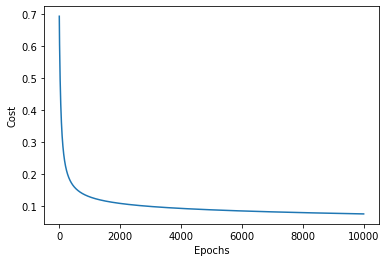

In [ ]:
plt.plot(np.arange(epoch), cost_list)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

Melakukan ploting untuk pengecekan logistic regression

In [ ]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = A.astype(int)
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100  
    print("Accuracy of the model is : ", round(acc, 2), "%")
    
    return A

In [ ]:
y_pred = accuracy(x_test, y_test, W, B)

Accuracy of the model is :  83.33 %


mecari akurasi dengan mengubah data yang dibawah 0.5 menjadi 0 dan diatas 0.5 menjadi 1 dan pada akhirnya mendapatkan akurasi sebesar 83.33%

In [ ]:
Testing_data ={'gmat':[590, 740, 680, 610, 710],
            'gpa':[2, 3.7, 3.3, 2.3, 3],
            'work_experience':[3, 4, 6, 1, 5]}

Melanjutkan mencari addmited dari testing data yang ada di soal

In [ ]:
test_dataset = pd.DataFrame(Testing_data)

In [ ]:
Test_keys = test_dataset.keys()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(test_dataset)

test_dataset = scaler.transform(test_dataset)
test_dataset = pd.DataFrame(test_dataset, columns = Test_keys)
New_x_test = test_dataset.T

Sama seperti di atas, testing data juga melewati 3 tahap dimana dijadikan dataframe, diberkia kunci dan diubah menjadi scalar, data juga di transpose agar bisa digunakan

In [ ]:
def FindingLabel(X, W, B):
    
    Z = np.dot(W.T, X) + B
    labeling = sigmoid(Z)
    
    labeling = labeling > 0.5

    labeling = labeling.astype(int)
    
    return labeling

In [ ]:
New_y_test = FindingLabel(New_x_test,W,B)
New_y_test 


array([[0, 1, 1, 0, 1]])

Mencari Weight dan bias dan untuk mendapatkan addmited, dari data testing dan menemukan array baru yang terdiri dari ([[0, 1, 1, 0, 1]])

In [ ]:
Print_new_data = pd.DataFrame(Testing_data)
addmited = [0, 1, 1, 0, 1]
Print_new_data['addmited']= addmited
Print_new_data

,gmat,gpa,work_experience,addmited
0,590,2.0,3,0
1,740,3.7,4,1
2,680,3.3,6,1
3,610,2.3,1,0
4,710,3.0,5,1


Dari Array tersebut saya masukan kedalam dataset  testing yang terdapat di soal(dataset awal sebelum dijadikan sacalar) dan mendaptkan addmited sesuai dengan yang soal inginkan

Ini adalah tampilan akhirnya